In [1]:
import nltk
import pandas as pd
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#nltk.download()

In [78]:
# The Project Gutenberg EBook of The Picture of Dorian Gray, by Oscar Wilde

text = open('./pg174.txt','r').read()
#print(text)

In [3]:
text_rows = text.splitlines()

In [4]:
text_rows = text_rows[45:8535]

In [5]:
df = pd.DataFrame(columns=['text','score','delta3'])


In [6]:
df['text'] = text_rows

In [57]:
dfn = df[df.text != '']

In [59]:
pos = open('./positive-words.txt','r').read().split()
neg = open('./negative-words.txt','r').read().split()
lemmatizer = WordNetLemmatizer()

In [60]:
for i in range(0, len(text_rows)):
    tokens = text_rows[i].split()
    countpositive = 0
    countnegative = 0
    
    for j in range(len(tokens)):
        if tokens[j].isalpha():
            tokens[j].lower()
        tokens[j] = lemmatizer.lemmatize(tokens[j])
        
        if tokens[j] in pos:
            countpositive = countpositive + 1
        elif tokens[j] in neg:
            countnegative = countnegative + 1
        dfn.score[i] = countpositive - countnegative


C:\Users\Tuomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [71]:
dfn['delta3'] = dfn.iloc[:,1].rolling(window=4).mean()
    

C:\Users\Tuomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


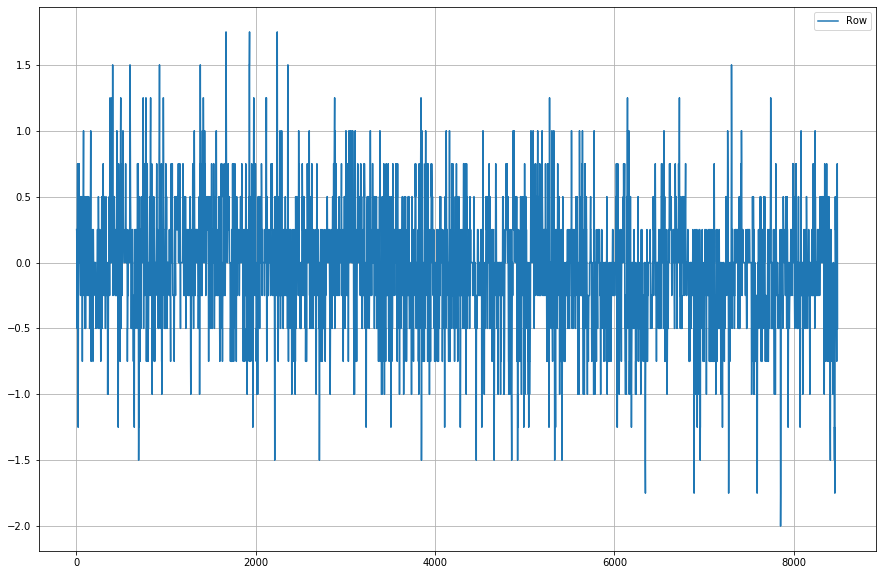

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(dfn['delta3'],label='Row')
plt.legend()

In [82]:
dfn.head(15)

,text,score,delta3
0,THE PREFACE,0,NaN
2,The artist is the creator of beautiful things....,1,NaN
3,conceal the artist is art's aim. The critic i...,-1,NaN
4,into another manner or a new material his impr...,1,0.25
5,things.,0,0.25
7,The highest as the lowest form of criticism is...,-1,-0.25
8,Those who find ugly meanings in beautiful thin...,-1,-0.25
9,being charming. This is a fault.,0,-0.50
11,Those who find beautiful meanings in beautiful...,2,0.00
12,cultivated. For these there is hope. They ar...,0,0.25
